In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np
import scipy
import seaborn as sns
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_1 = pd.read_csv('../data/routes_1.txt')
df_2 = pd.read_csv('../data/routes_2.txt')

In [4]:
location_subnet_dict_1 = {}
location_subnet_dict_1 = defaultdict(lambda:0, location_subnet_dict_1)

for i in range(len(df_1)):
    location_subnet_dict_1[df_1.iloc[i]["Location"]] += 1


location_subnet_dict_2 = {}
location_subnet_dict_2 = defaultdict(lambda:0, location_subnet_dict_2)

for i in range(len(df_2)):
    location_subnet_dict_2[df_2.iloc[i]["Location"]] += 1

In [5]:
val_1 = np.array(list(location_subnet_dict_1.values()))
val_2 = np.array(list(location_subnet_dict_2.values()))

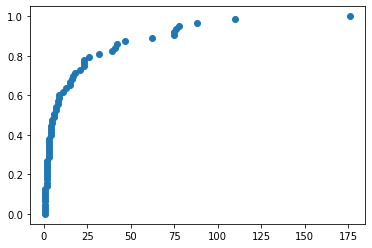

In [6]:

x= np.sort(val_1)
y = 1. * np.arange(len(val_1)) / (len(val_1) - 1)
plt.scatter(x,y)
plt.show()

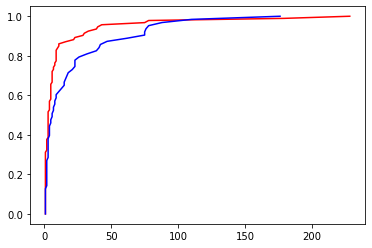

In [7]:
# sns.distplot(val_2, color = 'Blue')
x1= np.sort(val_2)
y1 = 1. * np.arange(len(val_2)) / (len(val_2) - 1)
plt.plot(x1,y1,color = 'Red')
plt.plot(x,y,color = 'Blue')
plt.show()

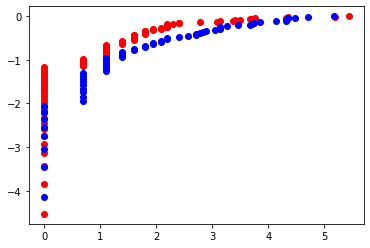

In [8]:
plt.scatter(np.log(x1),np.log(y1),color = 'Red')
plt.scatter(np.log(x),np.log(y),color = 'Blue')

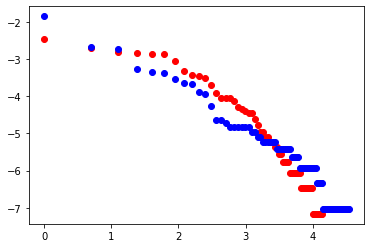

In [18]:
def probabilities(sum, freqs):
    probs = []
    for i in freqs:
        probs.append(i/sum)
    return probs
s1= sum(val_1)
s2 = sum(val_2)
pdf1 = np.sort(probabilities(s1,val_1))[::-1]
pdf2 = np.sort(probabilities(s2,val_2))[::-1]
x1 = range(len(pdf1))
x2 = range(len(pdf2))
plt.scatter(np.log(x1),np.log(pdf1), color ='Red')
plt.scatter(np.log(x2),np.log(pdf2), color ='Blue')


In [30]:
X1 = np.log(x1[1:]).reshape((-1,1))
Y1 = np.log(pdf1[1:])
m1 = LinearRegression().fit(X1,Y1)
s1 = m1.coef_
s1

array([-1.46118773])

In [32]:
X2 = np.log(x2[1:]).reshape((-1,1))
Y2 = np.log(pdf2[1:])
m2 = LinearRegression().fit(X2,Y2)
s2 = m2.coef_
s2

array([-1.29456496])

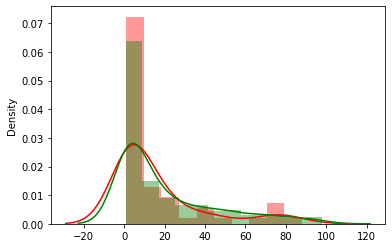

In [12]:
zipf1 = np.random.zipf(a=1.04, size=1000)

sns.distplot(val_1[val_1<100], color = 'Red')
sns.distplot(zipf1[zipf1<100], color = 'Green')
plt.show()

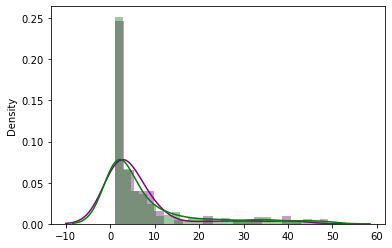

In [13]:
zipf2 = np.random.zipf(a=1.23, size=1000)

sns.distplot(val_2[val_2<50], color = 'Purple')
sns.distplot(zipf2[zipf2<50], color = 'Green')
plt.show()